In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Customer_Churn.csv');
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# replacing blanks with 0 as tenure is 0 and 0 no total charges are recorded

In [11]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [12]:
df["tenure"] = df["tenure"].replace(" ","0")
df["tenure"] = df["tenure"].astype("int")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.isnull().sum().sum()

np.int64(0)

In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df["customerID"].duplicated().sum()

np.int64(0)

In [19]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

# convert 0 and 1 values of senior citizen to yes/no get easier to understand

In [20]:
df.head(40)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


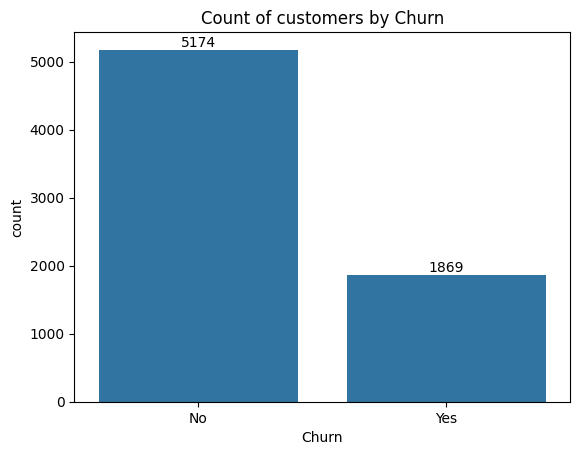

In [22]:
ax = sns.countplot(x= 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show()

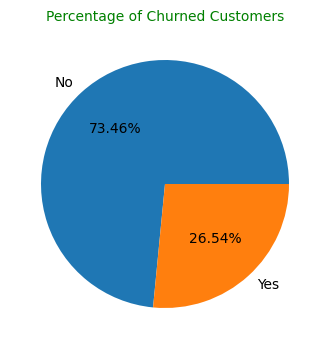

In [23]:
plt.figure(figsize = (4,6))
gb = df.groupby("Churn").agg({'Churn': "count"})
gb
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 10, color = "green")
plt.show()

# From the given pie chart we can conclude that 26.54% of our customers have churned out.
# now let's explore the reason behind it.

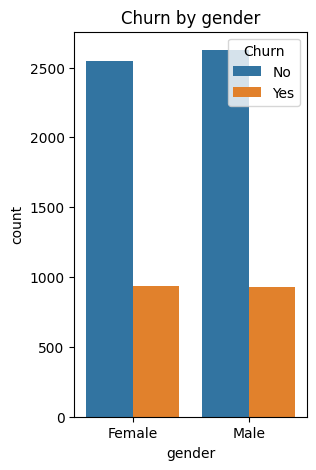

In [24]:
plt.figure(figsize = (3,5))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by gender")
plt.show()

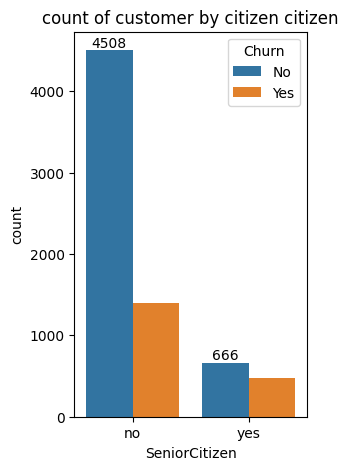

In [35]:
plt.figure(figsize = (3,5))
ax=sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("count of customer by citizen citizen")
plt.show()

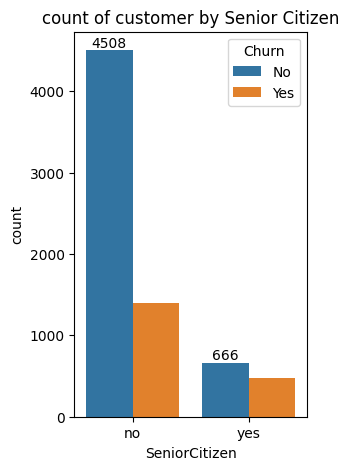

In [36]:
plt.figure(figsize = (3,5))
ax=sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("count of customer by Senior Citizen")
plt.show()

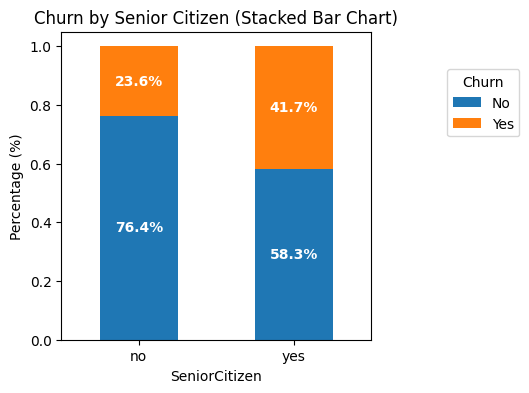

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()

# plot
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust figsize for better visualization

# plots for bars (stacked)
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # sirf non-zero bars pe label lagao
        ax.text(x + width / 2, y + height / 2,
                f'{height * 100:.1f}%',  # % me convert
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor =(1.5,0.9), loc='upper right')  # customize legend location

plt.show()


# comparative a greated percentage of people in senoir citizen category have churned

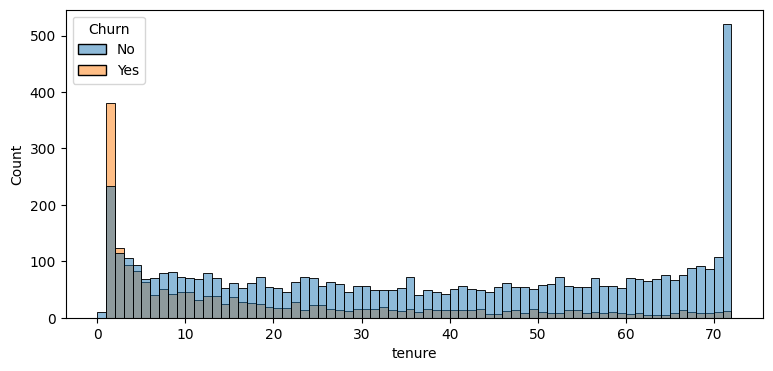

In [53]:
plt.figure(figsize =(9,4))
sns.histplot(x ="tenure", data = df, bins=72, hue='Churn')

plt.show()

# people who have used our services for a long time have stayed and people who have used our services have churned

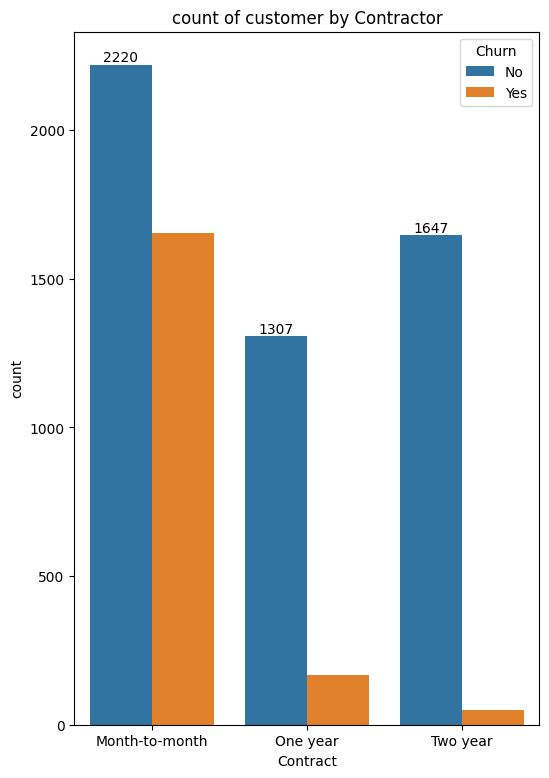

In [56]:
plt.figure(figsize = (6,9))
ax=sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("count of customer by Contractor")
plt.show()

# people who have month to month contract are likely to churn then from those who have 1 and 2 years or contract

In [57]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

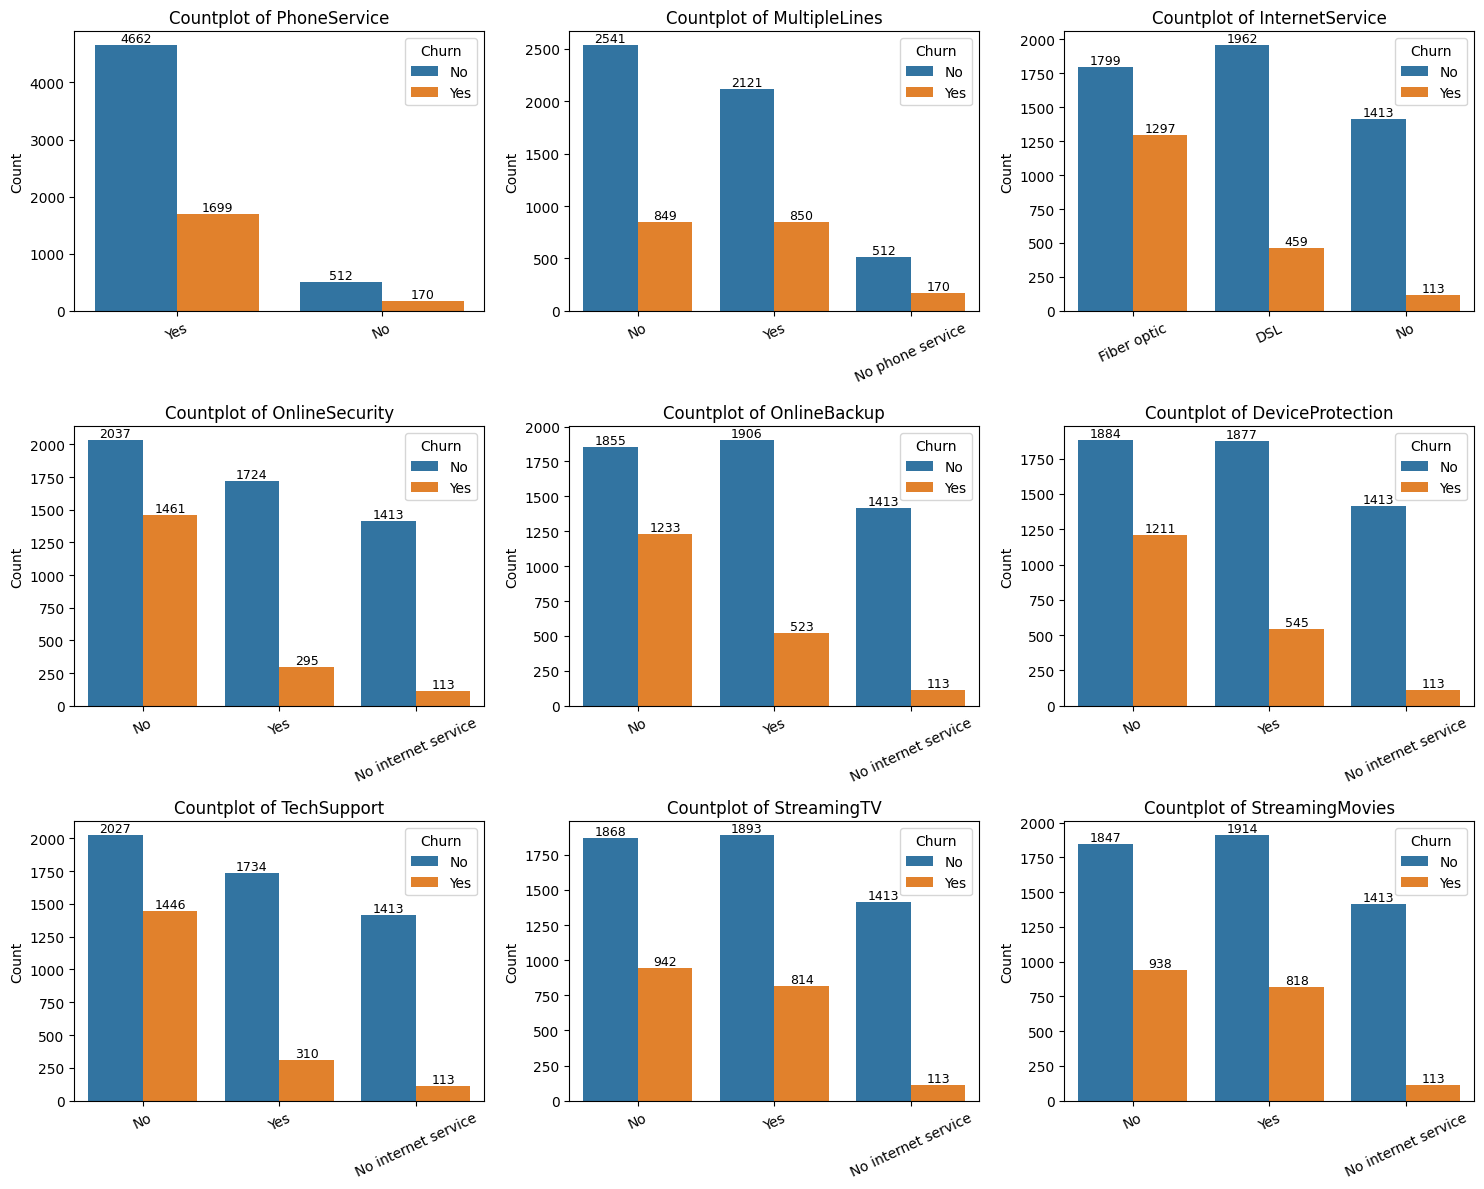

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# --- sanity checks ---
missing_cols = [c for c in cols if c not in df.columns]
if missing_cols:
    print("Warning: these columns not found in df and will be skipped:", missing_cols)

cols = [c for c in cols if c in df.columns]
if len(cols) == 0:
    raise ValueError("No valid columns found to plot. Check column names in `df`.")

# layout: 3 columns (change ncols if you prefer different grid)
n = len(cols)
ncols = 3
nrows = (n + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    # safe-guard: convert to string and fillna so countplot won't fail on weird dtypes
    df[col] = df[col].fillna('Missing').astype(str)

    # keep categories ordered by frequency (optional)
    order = df[col].value_counts().index

    try:
        sns.countplot(data=df, x=col, ax=ax, order=order, hue=df["Churn"])   # remove `palette` if you want default
        ax.set_title(f"Countplot of {col}")
        ax.set_xlabel("")
        ax.set_ylabel("Count")
        ax.tick_params(axis='x', rotation=25)

        # annotate bar heights
        for p in ax.patches:
            h = p.get_height()
            if h > 0:
                ax.annotate(f'{int(h)}', 
                            (p.get_x() + p.get_width() / 2., h),
                            ha='center', va='bottom', fontsize=9)
    except Exception as e:
        # show error message inside the subplot instead of crashing
        ax.text(0.5, 0.5, f"Error plotting {col}:\n{e}", ha='center', va='center')
        ax.set_xticks([])
        ax.set_yticks([])

# remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# The analysis of service-related features highlights clear patterns in customer churn behavior. Customers without internet services dominate the dataset, while those who subscribe to value-added services such as OnlineSecurity, TechSupport, and DeviceProtection show significantly different churn tendencies. In particular, customers lacking these protective or support services exhibit much higher churn rates. Although PhoneService is nearly universal, variations in multiple lines and additional internet-based services reveal stronger associations with customer attrition, underscoring the role of bundled digital services in reducing churn.

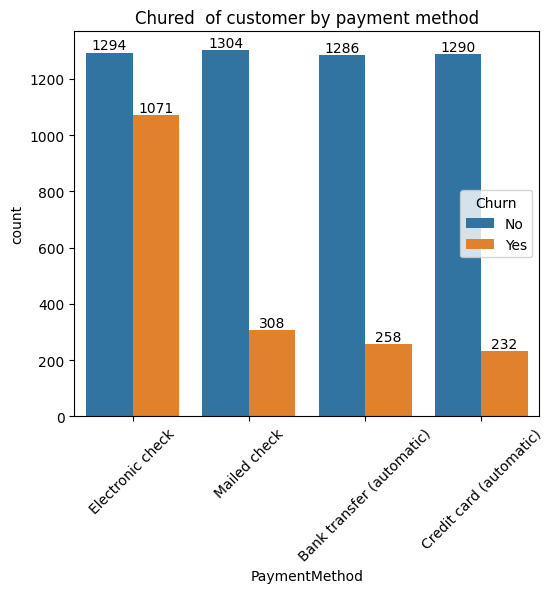

In [67]:
plt.figure(figsize = (6,5))
ax=sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Chured  of customer by payment method")
plt.xticks(rotation=45)
plt.show()

# Customers is likely to churn when he is using electronic check as a payment method.